Здесь будут удалены признаки, которые мало влияют на результат: PassengerId, Name, Ticket, Cabin, Age, SibSp, Parch.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Подготовка данных
Удалим из данных ненужные столбцы

In [3]:
a = ["PassengerId", "Name", "Ticket", "Cabin", 'SibSp', 'Parch', 'Age']
train.drop(a, axis = 1, inplace = True)
test.drop(a, axis = 1, inplace = True)

Смотрим число пропущенных значений

In [4]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Fare        0
Embarked    2
dtype: int64

Вместо пропущенных значений вставим S - наиболее частый пункт.

In [5]:
train["Embarked"] = train["Embarked"].fillna("S")

In [6]:
test.isnull().sum()

Pclass      0
Sex         0
Fare        1
Embarked    0
dtype: int64

Вместо пропущенного вставим среднее значение.

In [7]:
test['Fare'] = test['Fare'].fillna((test['Fare'].mean()))

Заменим male на 1, female - на 0

In [8]:
train["Sex"] = train["Sex"].map({'female': 0, 'male': 1})
test["Sex"] = test["Sex"].map({'female': 0, 'male': 1})

Аналогично со столбцом Embarked

In [9]:
train["Embarked"] = train["Embarked"].map({'S': 2, 'Q': 1, 'C': 0})
test["Embarked"] = test["Embarked"].map({'S': 2, 'Q': 1, 'C': 0})

In [10]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,1,7.2500,2
1,1,1,0,71.2833,0
2,1,3,0,7.9250,2
3,1,1,0,53.1000,2
4,0,3,1,8.0500,2


In [11]:
test.head()

,Pclass,Sex,Fare,Embarked
0,3,1,7.8292,1
1,3,0,7.0000,2
2,2,1,9.6875,1
3,3,1,8.6625,2
4,3,0,12.2875,2


Разделяем данные

In [12]:
X = train.iloc[:, 1:5].values
Y = train.iloc[:, 0].values

In [13]:
X

array([[ 3.    ,  1.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 3.    ,  0.    , 23.45  ,  2.    ],
       [ 1.    ,  1.    , 30.    ,  0.    ],
       [ 3.    ,  1.    ,  7.75  ,  1.    ]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4, random_state=4)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(534, 4) (357, 4) (534,) (357,)


#### KNN
Посмотрим результаты обучения для моделей с числом соседей от 1 до 15

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Масштабирование данных

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучение

In [18]:
kk = range(1, 15)

scores = []
err_train = []
err_test = []

for k in kk:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    err_train.append(np.mean(knn.predict(X_train) != y_train))
    err_test.append(np.mean(knn.predict(X_test) != y_test))

Доля выборок, правильно спрогнозированных

In [19]:
print(scores)

[0.8067226890756303, 0.8319327731092437, 0.8207282913165266, 0.8431372549019608, 0.8207282913165266, 0.8235294117647058, 0.8067226890756303, 0.8235294117647058, 0.8235294117647058, 0.8403361344537815, 0.834733893557423, 0.8375350140056023, 0.84593837535014, 0.8375350140056023]


(15, 0)

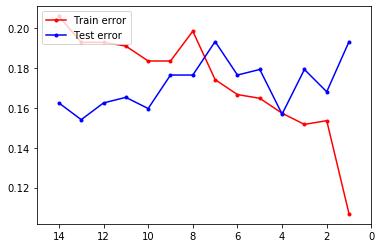

In [20]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.xlim([15, 0])

Минимальное число ошибок

In [21]:
print(min(err_test))
print(kk[err_test.index(min(err_test))])
print(scores[kk[err_test.index(min(err_test))]])

0.15406162464985995
13
0.8375350140056023


Оценка алгоритма для наиболее точной модели

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       234
           1       0.86      0.66      0.75       123

    accuracy                           0.85       357
   macro avg       0.85      0.80      0.82       357
weighted avg       0.85      0.85      0.84       357

[[221  13]
 [ 42  81]]


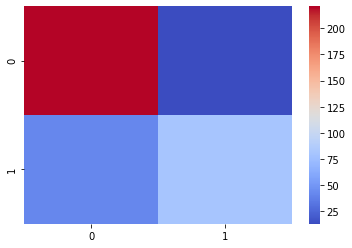

In [54]:
knn1 = KNeighborsClassifier(n_neighbors=13)

knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = knn1.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred))
print('Среднеквадратическая ошибка', mean_squared_error(y_test, y_pred))

rez = []
rez = [accuracy_score(y_test, y_pred)]

Средняя абсолютная ошибка 0.15406162464985995
Среднеквадратическая ошибка 0.15406162464985995


#### Логистическая регрессия

In [56]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression()
lrg.fit(X_train, y_train)

LogisticRegression()

In [57]:
y_pred = lrg.predict(X_test)
err_train_lrg = np.mean(lrg.predict(X_train) != y_train)
err_test_lrg = np.mean(lrg.predict(X_test) != y_test)
print("Доля правильно спрогнозированных выборок:", accuracy_score(y_test, y_pred))
print("error_train =", err_train_lrg)
print("error_test =", err_test_lrg)

Доля правильно спрогнозированных выборок: 0.7955182072829131
error_train = 0.2340823970037453
error_test = 0.20448179271708683


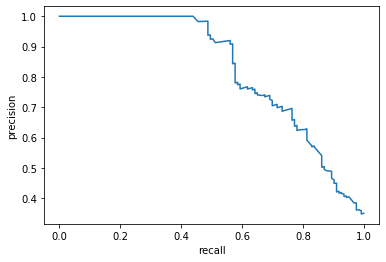

In [58]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, lrg.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

Оценка алгоритма

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       234
           1       0.69      0.74      0.71       123

    accuracy                           0.80       357
   macro avg       0.77      0.78      0.78       357
weighted avg       0.80      0.80      0.80       357

[[193  41]
 [ 32  91]]


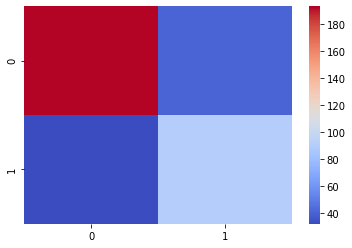

In [59]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");

In [60]:
print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred))
print('Среднеквадратическая ошибка', mean_squared_error(y_test, y_pred))

rez.append(accuracy_score(y_test, y_pred))

Средняя абсолютная ошибка 0.20448179271708683
Среднеквадратическая ошибка 0.20448179271708683


#### Деревья решений

In [61]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

Ограничим максимальную глубину и посмотрим точность модели.

In [62]:
scores = []
err_train = []
err_test = []

kk = range(1, 10)
for max_depth in kk:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    err_train.append(np.mean(clf.predict(X_train) != y_train))
    err_test.append(np.mean(clf.predict(X_test) != y_test))   

Доля выборок, правильно спрогнозированных

In [63]:
print(scores)

[0.8067226890756303, 0.8067226890756303, 0.8319327731092437, 0.8179271708683473, 0.7871148459383753, 0.8319327731092437, 0.8375350140056023, 0.8179271708683473, 0.834733893557423]


(15, 0)

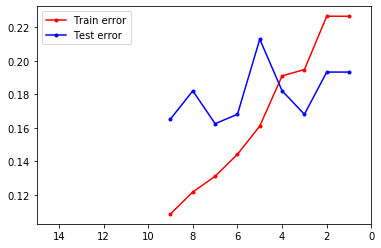

In [64]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
plt.xlim([15, 0])

Наиболее точно алгоритм работает при max_depth = 6

In [65]:
print(min(err_test))
print(kk[err_test.index(min(err_test))])
print(scores[kk[err_test.index(min(err_test))]])

0.16246498599439776
7
0.8179271708683473


In [72]:
scores = []

kk = range(1, 5)
for i in kk:
    clf = tree.DecisionTreeClassifier(max_depth=6, max_features = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
print(scores)
print(scores.index(max(scores)), " : ", max(scores))

[0.7843137254901961, 0.8123249299719888, 0.7927170868347339, 0.8431372549019608]
3  :  0.8431372549019608


Оценка

0.84593837535014
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       234
           1       0.89      0.63      0.74       123

    accuracy                           0.85       357
   macro avg       0.86      0.80      0.81       357
weighted avg       0.85      0.85      0.84       357

[[224  10]
 [ 45  78]]


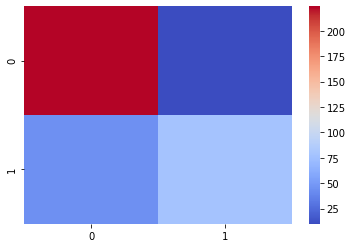

In [73]:
clf1 = tree.DecisionTreeClassifier(max_depth=6, max_features=3)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");

In [74]:
print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred))
print('Среднеквадратическая ошибка', mean_squared_error(y_test, y_pred))
rez.append(accuracy_score(y_test, y_pred))

Средняя абсолютная ошибка 0.15406162464985995
Среднеквадратическая ошибка 0.15406162464985995


In [75]:
# правила дерева решений
text_representation = tree.export_text(clf1)
print(text_representation)

|--- feature_2 <= -0.42
|   |--- feature_1 <= -0.26
|   |   |--- feature_3 <= -0.03
|   |   |   |--- feature_2 <= -0.47
|   |   |   |   |--- feature_3 <= -1.30
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  -1.30
|   |   |   |   |   |--- feature_2 <= -0.48
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  -0.48
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  -0.47
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  -0.03
|   |   |   |--- feature_2 <= -0.48
|   |   |   |   |--- feature_2 <= -0.48
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  -0.48
|   |   |   |   |   |--- feature_2 <= -0.48
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  -0.48
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  -0.48
|   |   |   |   |--- feature_2 <= -0.44
|   |   |   |   |   |--- feature_2 <= -0.47
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature

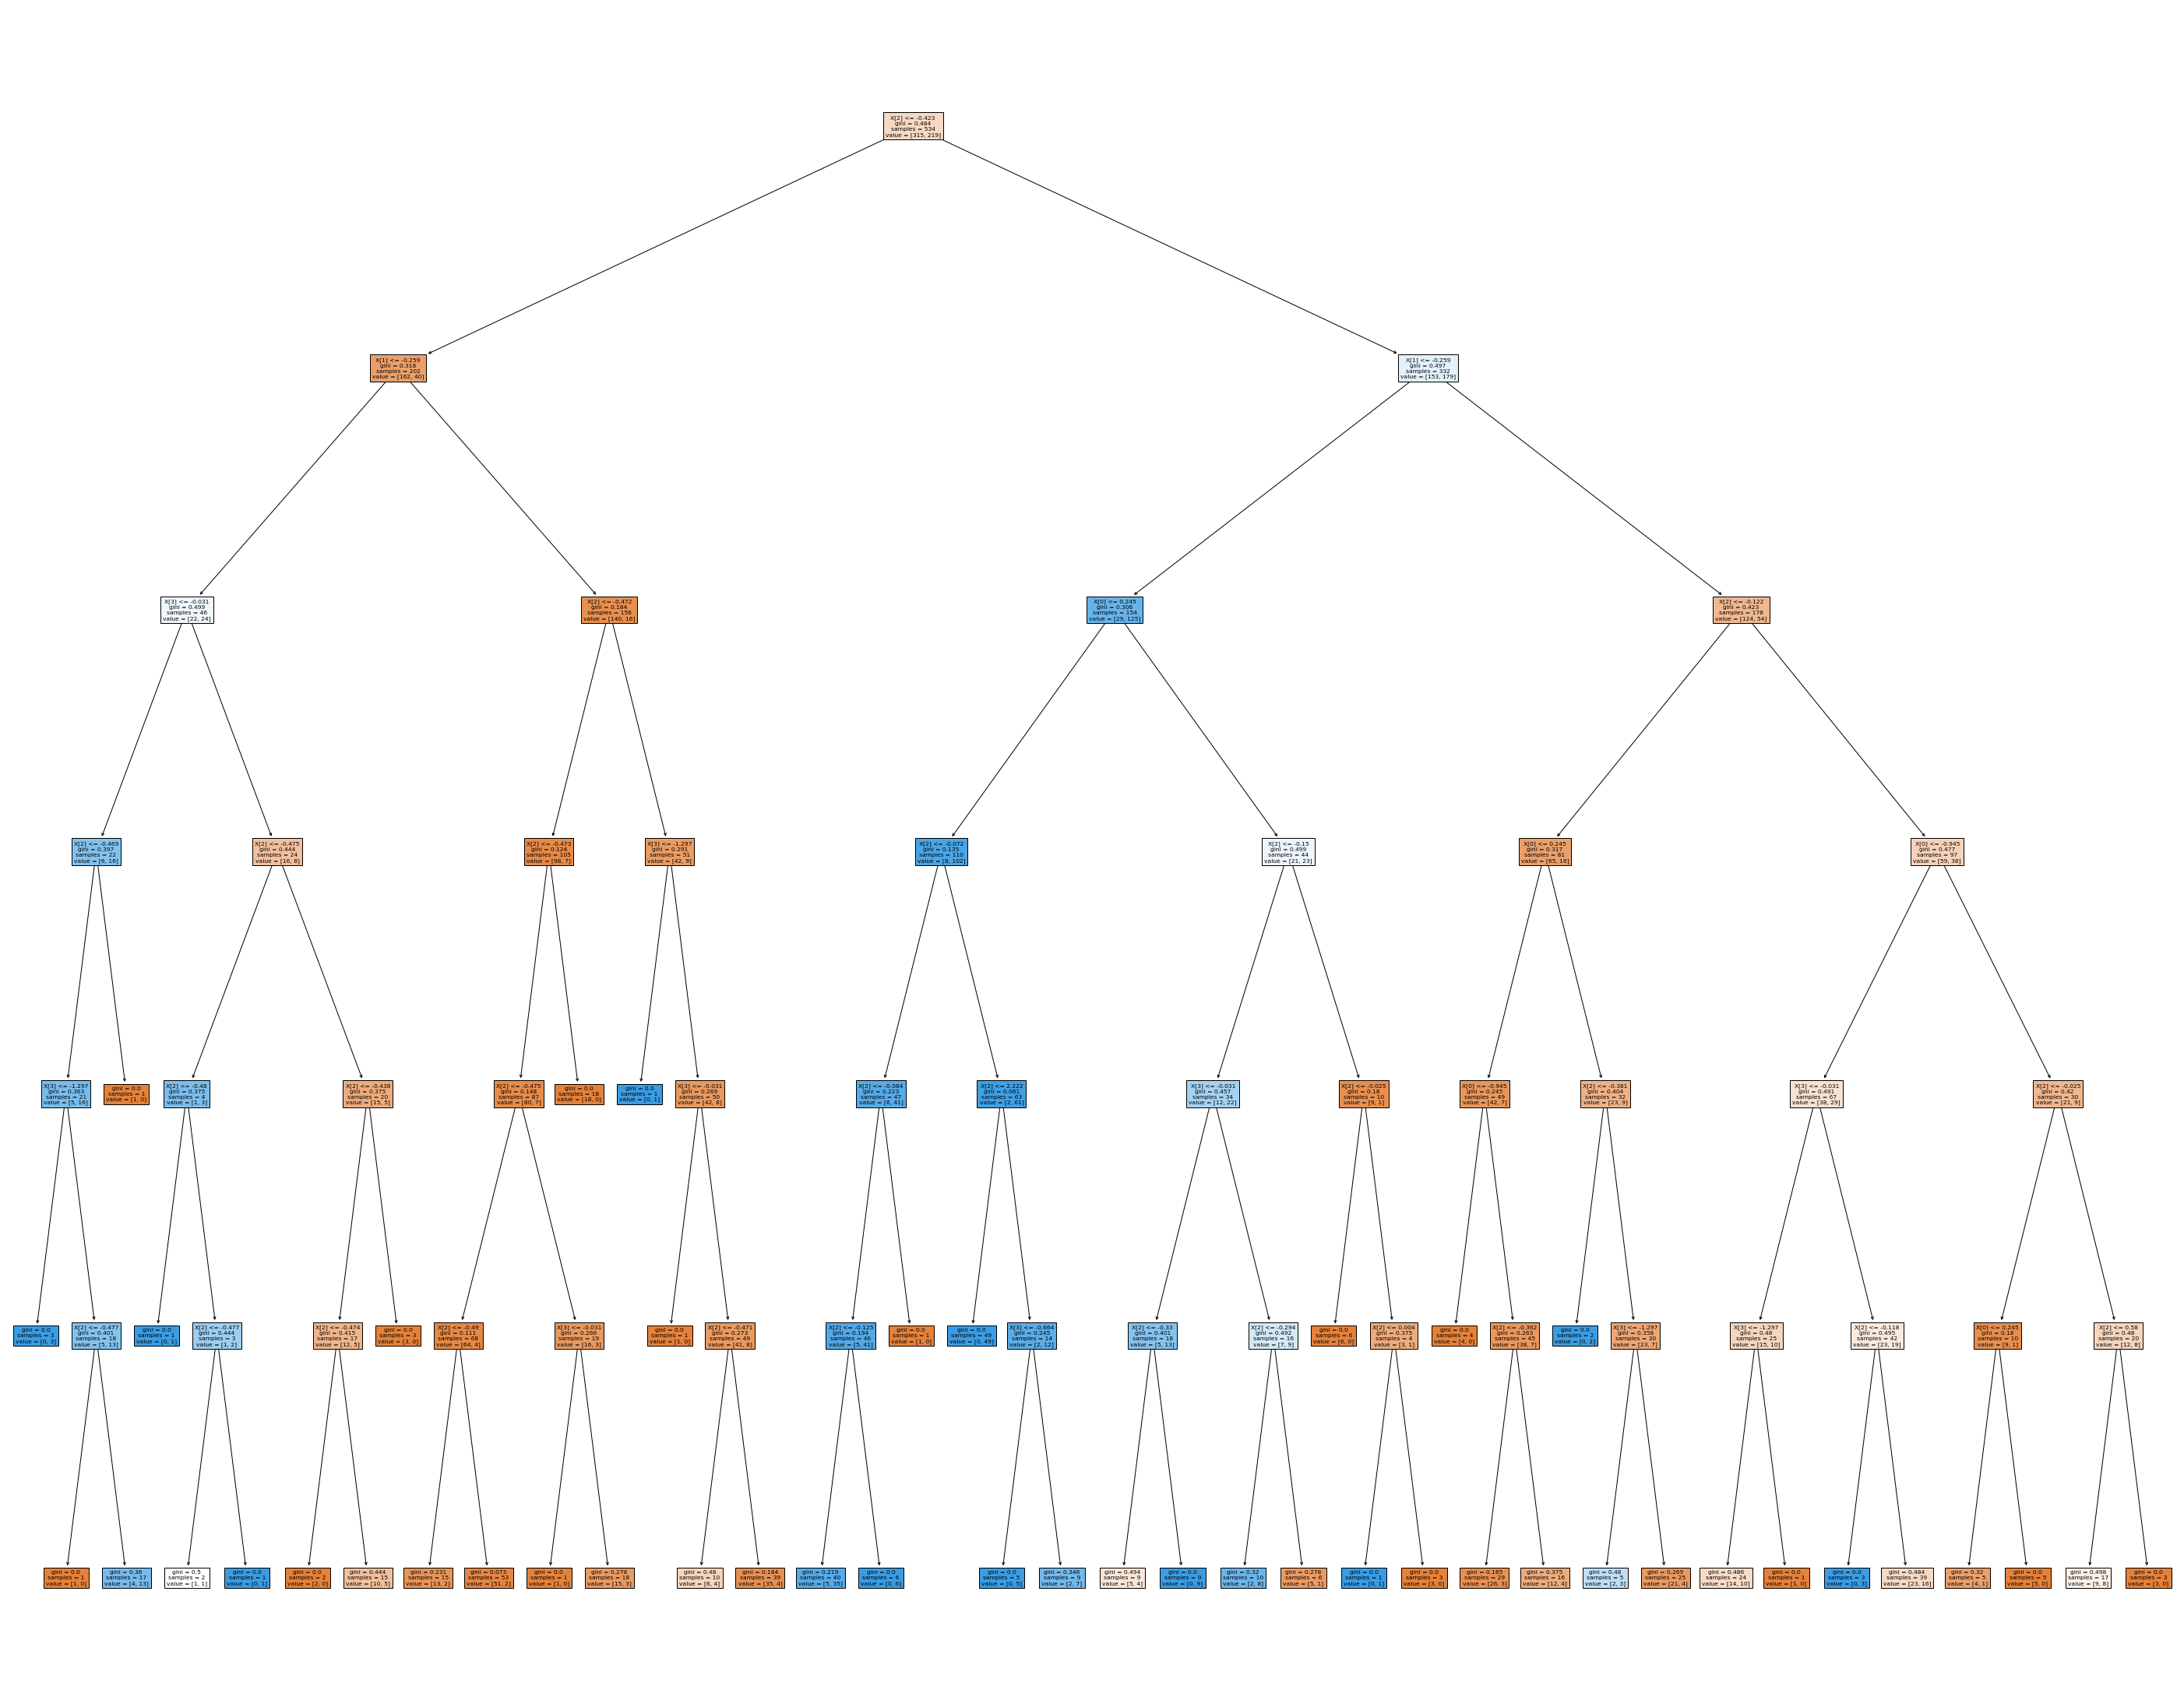

In [76]:
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf1, filled=True);

#### Случайный лес

In [77]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

Эффективность по количеству деревьев

In [78]:
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

cross_ = []
scores_rfc = []
trees_grid = range(45, 60)

for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, oob_score=True,  
                                 random_state=1,  n_jobs=-1) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(ntrees, " : ", a_)

45  :  0.8375350140056023
46  :  0.8375350140056023
47  :  0.8319327731092437
48  :  0.8403361344537815
49  :  0.834733893557423
50  :  0.8403361344537815
51  :  0.8403361344537815
52  :  0.8403361344537815
53  :  0.834733893557423
54  :  0.8403361344537815
55  :  0.834733893557423
56  :  0.8403361344537815
57  :  0.8375350140056023
58  :  0.8403361344537815
59  :  0.8403361344537815


In [79]:
print(trees_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

48  :  0.8403361344537815


Эффективность по глубине дерева для n_estimators = 48 

In [80]:
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
cross_ = []
scores_rfc = []

for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=48,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = max_depth) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(max_depth, " : ", a_)
print("Max: ", max_depth_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

3  :  0.834733893557423
5  :  0.8375350140056023
7  :  0.8291316526610645
9  :  0.834733893557423
11  :  0.8235294117647058
13  :  0.8375350140056023
15  :  0.8375350140056023
17  :  0.8403361344537815
20  :  0.8403361344537815
22  :  0.8403361344537815
24  :  0.8403361344537815
Max:  17  :  0.8403361344537815


Минимальное количество выборок, которое требуется для конечного узла. 

In [81]:
min_samples_leaf_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
cross_ = []
scores_rfc = []

for i in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=48,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = 17, min_samples_leaf = i) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(i, " : ", a_)
print("Min: ", min_samples_leaf_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

3  :  0.8235294117647058
5  :  0.8319327731092437
7  :  0.8375350140056023
9  :  0.8291316526610645
11  :  0.8179271708683473
13  :  0.8207282913165266
15  :  0.8235294117647058
17  :  0.8263305322128851
20  :  0.8179271708683473
22  :  0.8151260504201681
24  :  0.8011204481792717
Min:  7  :  0.8375350140056023


В данном случае мы проигрываем по эффективности.

Максимальное число признаков

In [83]:
max_features_grid = range(1, 5)
cross_ = []
scores_rfc = []

for i in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=48,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = 17, max_features = i) 
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    a_ = accuracy_score(y_test, y_pred)
    scores_rfc.append(a_)
    print(i, " : ", a_)
print("Max_features: ", max_features_grid[scores_rfc.index(max(scores_rfc))], " : ", max(scores_rfc))

1  :  0.8291316526610645
2  :  0.8403361344537815
3  :  0.8431372549019608
4  :  0.8431372549019608
Max_features:  3  :  0.8431372549019608


Таким образом, наилучший результат:

Accuracy_score =  0.8375350140056023
Средняя абсолютная ошибка 0.16246498599439776
Среднеквадратическая ошибка 0.16246498599439776
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       234
           1       0.79      0.72      0.75       123

    accuracy                           0.84       357
   macro avg       0.83      0.81      0.82       357
weighted avg       0.84      0.84      0.84       357

[[211  23]
 [ 35  88]]


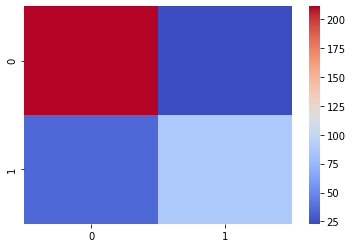

In [84]:
rfc = RandomForestClassifier(n_estimators=46,  oob_score=True,  
                                 random_state=1,  n_jobs=-1, 
                                 max_depth = 15, max_features = 3)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy_score = ", accuracy_score(y_test, y_pred))
print('Средняя абсолютная ошибка', mean_absolute_error(y_test, y_pred))
print('Среднеквадратическая ошибка', mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="coolwarm");
rez.append(accuracy_score(y_test, y_pred))

#### Оценка всех алгоритмов

In [85]:
b = ["KNN", "LOG_REG", "TREE_DES", "RAND_FORS"]
pd.DataFrame({'model': b, 'result': rez})

,model,result
0,KNN,0.845938
1,LOG_REG,0.795518
2,TREE_DES,0.845938
3,RAND_FORS,0.837535


Таким образом, наиболее эффективны модели KNN И дерево решений.